In [7]:
import pandas as pd

### --- Read data ---

In [8]:
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.max_rows", None)      # show all rows
pd.set_option("display.width", 2000)         # set the maximum width

data = pd.read_csv("data.csv")

### --- Data info ---

In [9]:
info = data.info() # rows and cols amount, col names, datatypes, non-null values per col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

### --- Data statistics ---

In [10]:
data.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


### --- Data shape ---

In [11]:
data.shape

(1433, 63)

### --- Visualization of missing values ---

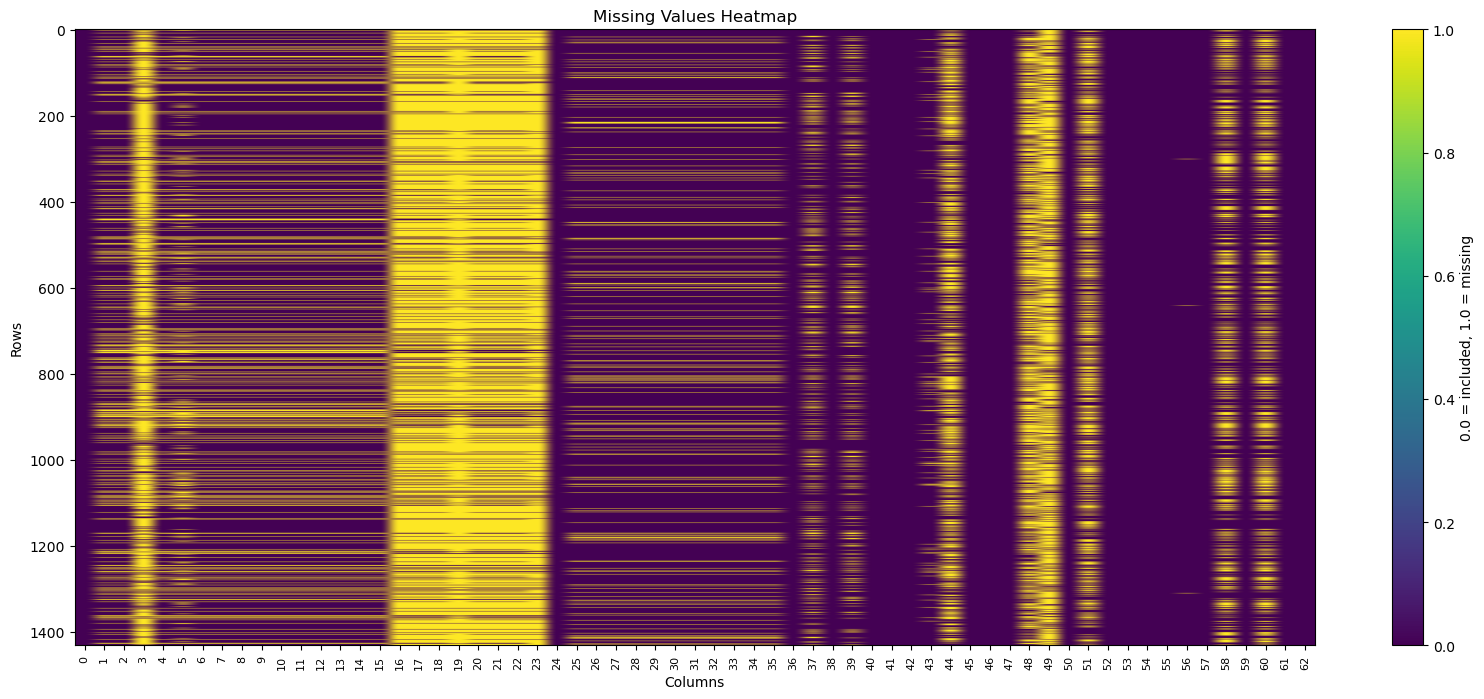

In [12]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,8)
plt.imshow(data.isna(), aspect='auto', cmap='viridis')
cbar = plt.colorbar()
cbar.set_label("0.0 = included, 1.0 = missing")
plt.xticks(
    ticks=np.arange(0, len(data.columns), 1),
    rotation=90,
    fontsize=8
)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.savefig("missing_values.png", dpi=300, bbox_inches="tight")
plt.show()

### --- Questions with most missing values ---

In [13]:
missing = data.iloc[:, 16:24] 
missing.head(10)

,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,"Yes, I know several","Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",I'm not sure,Yes,1-25%
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,I know some,"No, because it doesn't matter",NaN,"Sometimes, if it comes up",No,Yes,1-25%


### --- Visualization of GENDER values ---

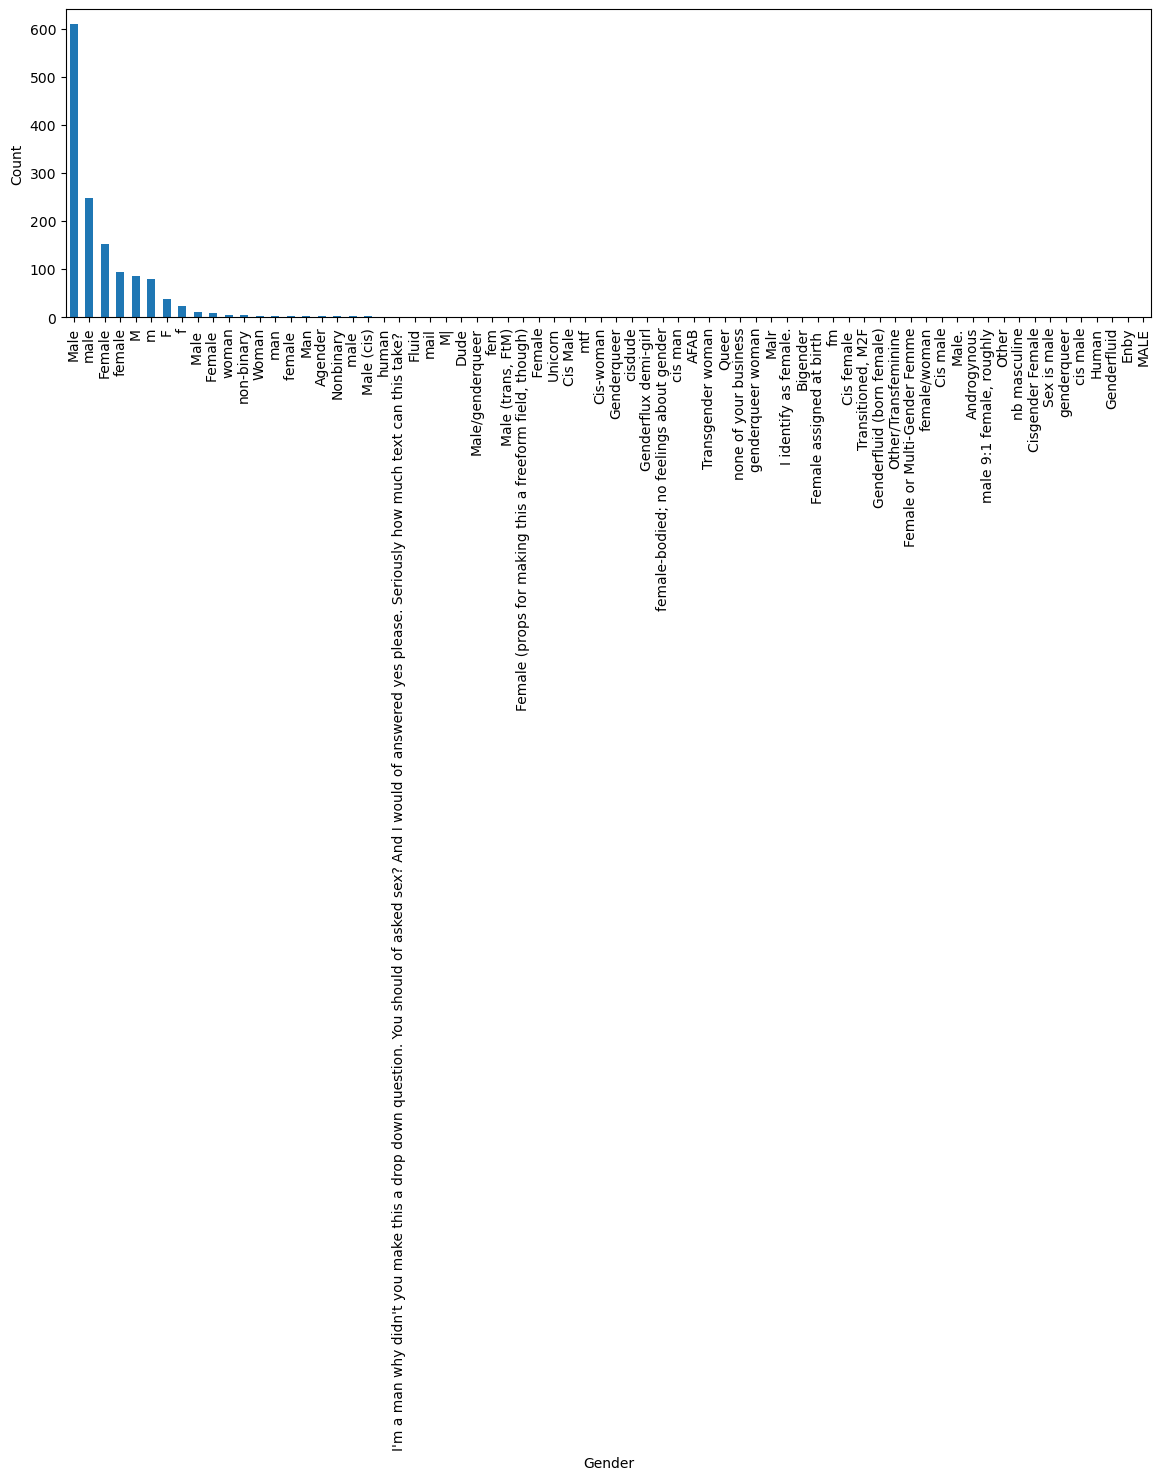

In [14]:
plt.rcParams["figure.figsize"] = (14,4)
data["What is your gender?"].value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("gender_values_initially.png", dpi=300, bbox_inches="tight")
plt.show()

### --- Visualization of AGE values ---

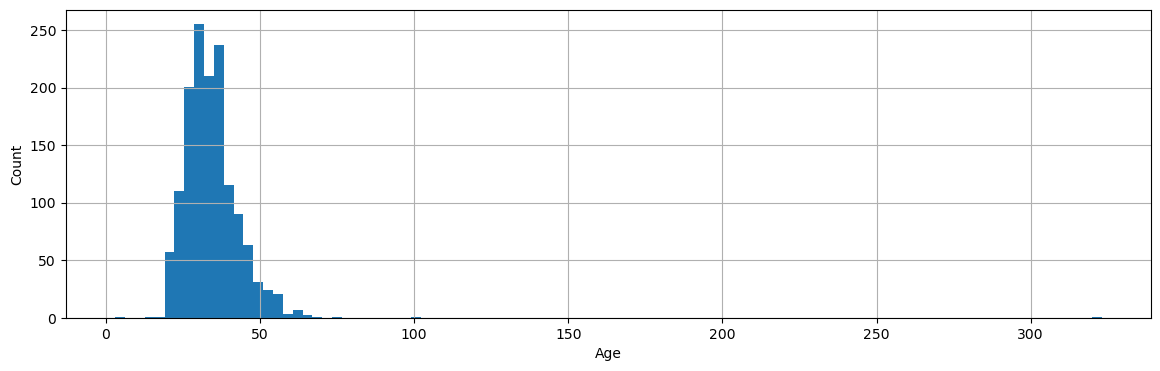

In [15]:
data['What is your age?'].hist(bins=100)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### --- Visualization of AGE outliers ---

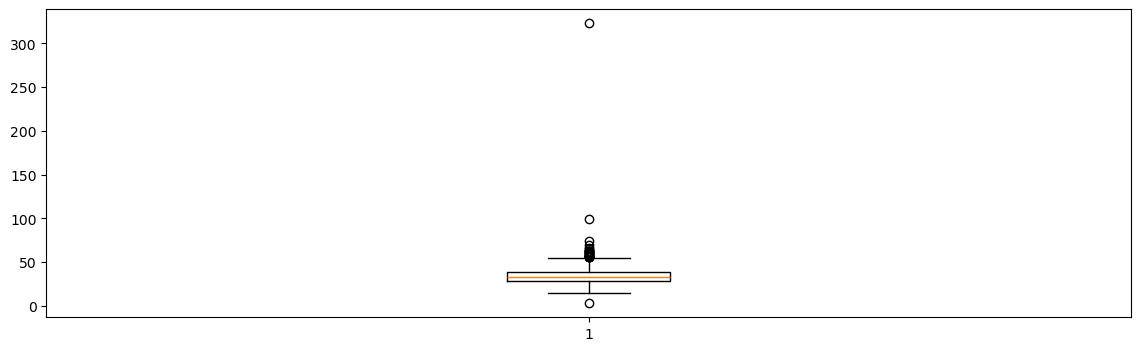

In [16]:
plt.boxplot(data['What is your age?'])
plt.savefig("age_outliers.png", dpi=300, bbox_inches="tight")
plt.show()

### --- Visualization of countries where Questioned live ---

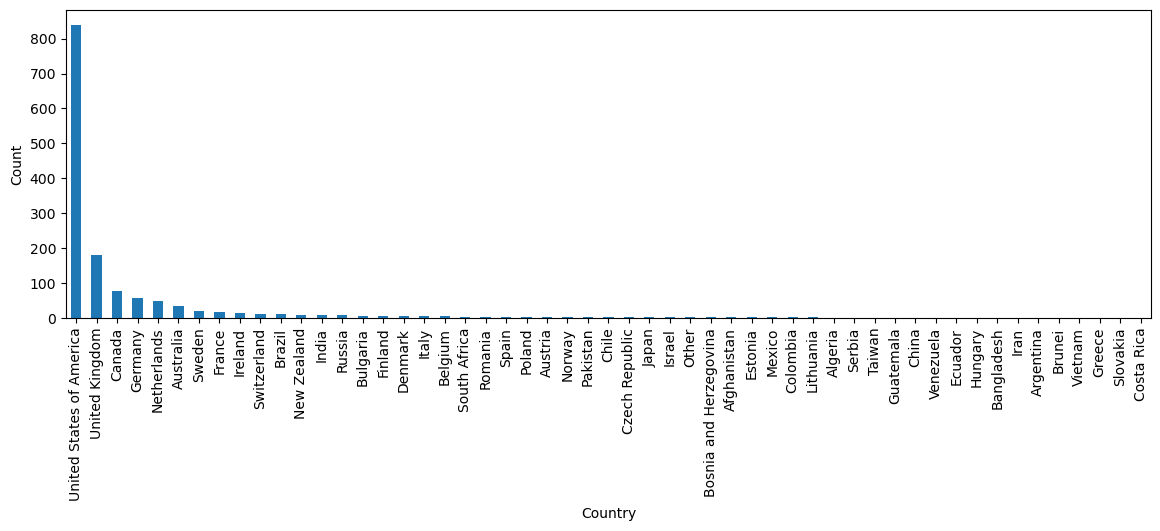

In [40]:
data["What country do you live in?"].value_counts().plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

### --- Visualization of countries where Questioned work ---

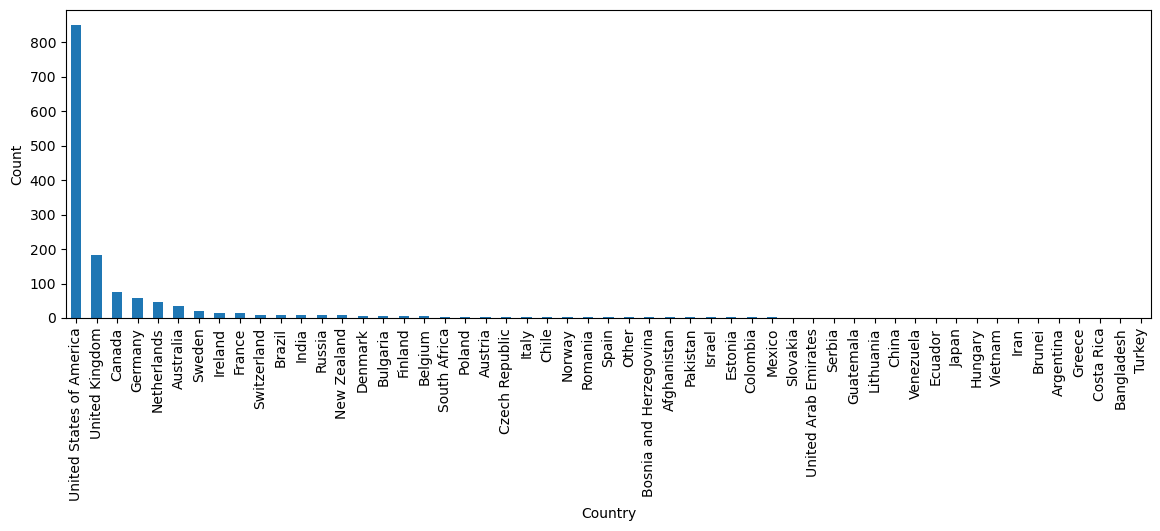

In [41]:
data["What country do you work in?"].value_counts().plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [23]:
data["same_country"] = data['What country do you live in?'] == data['What country do you work in?']
data["same_country"].value_counts()

same_country
True     1407
False      26
Name: count, dtype: int64